In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Enable quiet mode to hide verbose output
!pip install -q nilearn

# Ensure a stable PyTorch version
!pip install torch==2.5.1 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

# Install compatible PyG wheels for torch 2.5.1 + cu121
!pip install torch-scatter==2.1.2 -f https://data.pyg.org/whl/torch-2.5.1+cu121.html
!pip install torch-sparse==0.6.18 -f https://data.pyg.org/whl/torch-2.5.1+cu121.html
!pip install torch-cluster==1.6.3 -f https://data.pyg.org/whl/torch-2.5.1+cu121.html
!pip install torch-spline-conv==1.2.2 -f https://data.pyg.org/whl/torch-2.5.1+cu121.html
!pip install torch-geometric==2.6.1

# Check installations
import torch, nilearn
import torch_geometric
print("Torch:", torch.__version__)
print("Nilearn:", nilearn.__version__)
print("PyG:", torch_geometric.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 142.5 MB/s eta 0:00:00
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.4/780.4 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 119.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 154.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/

In [3]:
import pandas as pd
import os

# Paths
data_dir = '/content/drive/Shareddrives/291A_Brain_Connectomes/AABC_Release1_Non-imaging_Data-XL.csv'
cov_dir = '/content/drive/Shareddrives/291A_Brain_Connectomes/FullCorrelationSubjects'

# Load phenotypic data
phen_df = pd.read_csv(data_dir, low_memory=False)
subject_ids = phen_df.iloc[1:, 0].tolist()

# Pre-list files in the folder
existing_files = set(os.listdir(cov_dir))


In [4]:
import os
import pandas as pd
import numpy as np

cov_dict = {}
pheno_dict = {}
count = 0
max_subjects = 500  # TODO: change later

def load_covariance_numeric(path):
    """
    Load a CSV covariance/correlation matrix and return only the numeric part.
    Assumes first row and first column are labels.
    """
    df = pd.read_csv(path, header=None)
    numeric_matrix = df.iloc[1:, 1:].to_numpy(dtype=float)  # skip first row/column
    return numeric_matrix

for subject_id in subject_ids:
    filename = f"{subject_id}.csv"

    if filename in existing_files:
        # Load numeric covariance matrix
        cov_matrix = load_covariance_numeric(os.path.join(cov_dir, filename))

        # Load phenotypic row
        row = phen_df.loc[phen_df.iloc[:, 0] == subject_id]
        if row.empty:
            continue  # skip if no phenotypic info
        row_dict = row.iloc[0].to_dict()

        # Add to dicts
        cov_dict[subject_id] = cov_matrix
        pheno_dict[subject_id] = row_dict

        count += 1
        if count >= max_subjects:
            break

print("Loaded subjects:", len(cov_dict))
first_id = list(cov_dict.keys())[0]
print("Example subject:", first_id)
print("Covariance shape:", cov_dict[first_id].shape)
print("Phenotype keys:", list(pheno_dict[first_id].keys())[:10])


Loaded subjects: 500
Example subject: HCA6000030_V1
Covariance shape: (379, 379)
Phenotype keys: ['id_event - Subject ID concatenated data collection event (V1, V2, V3, etc.)', 'id - Subject ID', 'event - Study-specific visit/event short name (V1, In-person visit 1 | V2, In-person visit 2 | V3, In-person visit 3 | V4, In-person visit 4 | F1, First followup survey one year after first in-person visit in HCA | F2, Second followup survey in HCA | F3, Third followup survey in HCA | CR, Surveys collected remotely during Covid lock-down without regard to visit timing | AF1, First followup survey one year after first in-person visit in AABC)', 'study - Study during which data for this timepoint were collected', 'yearquarter_V1 - Year and Quarter of initial visit in HCA or AABC (e.g. year and quarter of V1)', 'days_from_V1 - Number of days from initial visit in HCA or AABC (e.g. days passed since V1)', 'yearquarter_event - Year and Quarter of event', 'age_open - Age in years, truncated at 90. 

In [5]:
import torch
from torch_geometric.data import Data
import numpy as np

age_col = "age_open - Age in years, truncated at 90.  Note that this will result in some individuals appearing to be the same age (e.g. 90) for most or all of the visits that happened several years apart."

def clean_age(age_val):
    if isinstance(age_val, str) and '90' in age_val:
        return 90.0
    return float(age_val)

dataset = []
threshold = 0.2

for subj_id, cov_matrix in cov_dict.items():

    # Skip missing ages
    if age_col not in pheno_dict[subj_id]:
        continue
    age_value = clean_age(pheno_dict[subj_id][age_col])
    if np.isnan(age_value):
        continue

    y = torch.tensor([age_value], dtype=torch.float)

    # convert and symmetrize
    cov_matrix = np.array(cov_matrix, dtype=float)
    cov_matrix = (cov_matrix + cov_matrix.T) / 2

    # Threshold
    cov_matrix[np.abs(cov_matrix) < threshold] = 0

    # Node features = full row vector for each node
    x = torch.tensor(cov_matrix, dtype=torch.float)

    # Edges (nonzero)
    row, col = np.nonzero(cov_matrix)
    edge_index = torch.tensor(np.vstack((row, col)), dtype=torch.long)

    # Edge weights from correlation/covariance values
    edge_attr = torch.tensor(cov_matrix[row, col], dtype=torch.float).unsqueeze(1)

    data = Data(
        x=x,
        edge_index=edge_index,
        edge_attr=edge_attr,
        y=y,
        sub_id=subj_id
    )

    dataset.append(data)

print(f"Prepared {len(dataset)} subjects for PyG GNN.")


Prepared 500 subjects for PyG GNN.


In [6]:
import torch
from torch_geometric.loader import DataLoader
import torch.nn.functional as F
from torch import nn, optim
from torch_geometric.nn import GATConv, global_mean_pool
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Model definition
class GATRegressor(nn.Module):
    def __init__(self, in_dim, hidden_dim=8, heads=2):
        super().__init__()
        self.gat1 = GATConv(in_dim, hidden_dim, heads=heads, concat=True, dropout=0.4, add_self_loops=False)
        self.gat2 = GATConv(hidden_dim * heads, hidden_dim, heads=heads, concat=True, dropout=0.4, add_self_loops=False)
        self.gat3 = GATConv(hidden_dim * heads, 1, heads=1, concat=False, dropout=0.4, add_self_loops=False)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.elu(self.gat1(x, edge_index))
        x = F.elu(self.gat2(x, edge_index))
        x = self.gat3(x, edge_index)
        return global_mean_pool(x, batch).view(-1)

# Scale ages
ages_raw = torch.tensor([d.y.item() for d in dataset], dtype=torch.float).view(-1, 1)
scaler = StandardScaler()
ages_scaled = torch.tensor(scaler.fit_transform(ages_raw), dtype=torch.float)

for i, d in enumerate(dataset):
    d.y = ages_scaled[i]  # replace y with scaled value

# Split dataset
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Model, optimizer, loss
in_dim = dataset[0].x.shape[1]
model = GATRegressor(in_dim)
optimizer = optim.Adam(model.parameters(), lr=0.005)
criterion = nn.MSELoss()

In [7]:
# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        pred = model(batch)
        loss = criterion(pred, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1:03d} - Train Loss: {total_loss/len(train_loader):.4f}")

Epoch 001 - Train Loss: 0.9036
Epoch 002 - Train Loss: 0.5868
Epoch 003 - Train Loss: 0.4450
Epoch 004 - Train Loss: 0.3619
Epoch 005 - Train Loss: 0.3060
Epoch 006 - Train Loss: 0.2683
Epoch 007 - Train Loss: 0.2260
Epoch 008 - Train Loss: 0.1831
Epoch 009 - Train Loss: 0.1743
Epoch 010 - Train Loss: 0.1420
Epoch 011 - Train Loss: 0.1059
Epoch 012 - Train Loss: 0.1054
Epoch 013 - Train Loss: 0.1068
Epoch 014 - Train Loss: 0.0946
Epoch 015 - Train Loss: 0.0622
Epoch 016 - Train Loss: 0.0594
Epoch 017 - Train Loss: 0.0580
Epoch 018 - Train Loss: 0.0524
Epoch 019 - Train Loss: 0.0477
Epoch 020 - Train Loss: 0.0401
Epoch 021 - Train Loss: 0.0570
Epoch 022 - Train Loss: 0.0474
Epoch 023 - Train Loss: 0.0374
Epoch 024 - Train Loss: 0.0292
Epoch 025 - Train Loss: 0.0215
Epoch 026 - Train Loss: 0.0209
Epoch 027 - Train Loss: 0.0203
Epoch 028 - Train Loss: 0.0166
Epoch 029 - Train Loss: 0.0295
Epoch 030 - Train Loss: 0.0257
Epoch 031 - Train Loss: 0.0343
Epoch 032 - Train Loss: 0.0531
Epoch 03

In [8]:
# Evaluation
model.eval()
preds = []

with torch.no_grad():
    for batch in test_loader:
        pred_scaled = model(batch)
        # convert back to real age
        pred_np = pred_scaled.numpy().reshape(-1, 1)
        pred_real = scaler.inverse_transform(pred_np).flatten()
        actual_np = batch.y.numpy().reshape(-1, 1)
        actual_real = scaler.inverse_transform(actual_np).flatten()

        for sub_id, p_val, a_val in zip(batch.sub_id, pred_real, actual_real):
            preds.append((sub_id, float(p_val), float(a_val)))
            print(f"{sub_id}: predicted {p_val:.2f} yrs, actual {a_val:.2f} yrs")

# Metrics
pred_vals = np.array([p for _, p, _ in preds])
actual_vals = np.array([a for _, _, a in preds])
rmse = np.sqrt(np.mean((pred_vals - actual_vals) ** 2))
mae = np.mean(np.abs(pred_vals - actual_vals))

print(f"\nRoot Mean Squared Error: {rmse:.2f} years")
print(f"Mean Absolute Error: {mae:.2f} years")

HCA6631671_V1: predicted 73.30 yrs, actual 68.00 yrs
HCA6108151_V2: predicted 73.17 yrs, actual 55.00 yrs
HCA6646583_V2: predicted 67.42 yrs, actual 68.00 yrs
HCA6291976_V1: predicted 43.32 yrs, actual 41.00 yrs
HCA6166973_V2: predicted 60.99 yrs, actual 61.00 yrs
HCA6671380_V1: predicted 78.77 yrs, actual 78.00 yrs
HCA6649993_V2: predicted 62.67 yrs, actual 68.00 yrs
HCA6242054_V1: predicted 80.67 yrs, actual 88.00 yrs
HCA6095572_V1: predicted 86.44 yrs, actual 74.00 yrs
HCA6756287_V1: predicted 51.93 yrs, actual 56.00 yrs
HCA6010538_V1: predicted 78.26 yrs, actual 64.00 yrs
HCA6375275_V2: predicted 51.14 yrs, actual 41.00 yrs
HCA6680987_V2: predicted 48.01 yrs, actual 47.00 yrs
HCA6121143_V1: predicted 76.26 yrs, actual 65.00 yrs
HCA6645985_V2: predicted 61.88 yrs, actual 68.00 yrs
HCA6668391_V2: predicted 46.38 yrs, actual 52.00 yrs
HCA6836992_V1: predicted 54.15 yrs, actual 44.00 yrs
HCA6051047_V3: predicted 53.75 yrs, actual 65.00 yrs
HCA6579089_V1: predicted 72.05 yrs, actual 88.

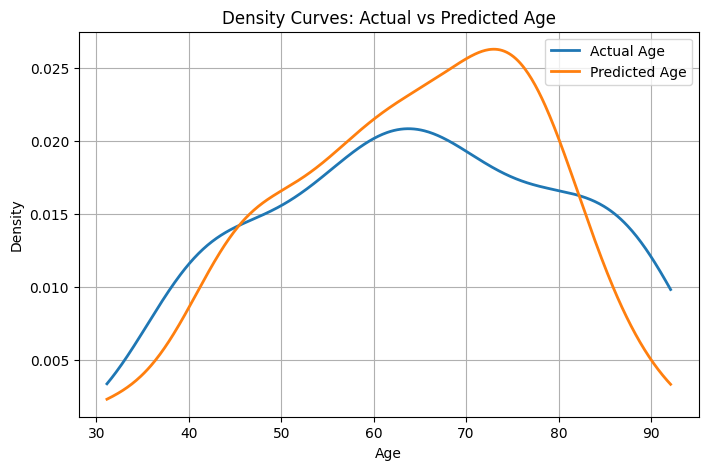

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Data
actual = np.array([a for _, _, a in preds])
pred = np.array([p for _, p, _ in preds])

# Compute KDE
kde_actual = gaussian_kde(actual)
kde_pred = gaussian_kde(pred)

# Evaluate over a common grid
xmin = min(actual.min(), pred.min())
xmax = max(actual.max(), pred.max())
xgrid = np.linspace(xmin, xmax, 500)

plt.figure(figsize=(8,5))
plt.plot(xgrid, kde_actual(xgrid), label="Actual Age", linewidth=2)
plt.plot(xgrid, kde_pred(xgrid), label="Predicted Age", linewidth=2)

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Density Curves: Actual vs Predicted Age")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Attention Extraction
import numpy as np
import matplotlib.pyplot as plt

model.eval()

all_attn_matrices = {}      # key: subj_id, value: NxN attention matrix
num_rois = dataset[0].x.shape[0]

print("\nExtracting attention matrices...")

with torch.no_grad():
    for batch in test_loader:

        # Get attention weights from the first GAT layer
        _, (edge_index, attn_weights) = model.gat1(
            batch.x, batch.edge_index, return_attention_weights=True
        )

        # Average across attention heads
        attn_mean = attn_weights.mean(dim=1).cpu().numpy()

        # Boundaries for each graph in the batch
        batch_graph_ptr = batch.ptr.cpu().numpy()
        edge_index_np = edge_index.cpu().numpy()

        # Loop through subjects in this batch
        for i, subj_id in enumerate(batch.sub_id):

            start = batch_graph_ptr[i]
            end   = batch_graph_ptr[i+1]

            # Extract edges belonging to this subject
            node_mask = (edge_index_np[0] >= start) & (edge_index_np[0] < end)
            idxs = np.where(node_mask)[0]

            # Build empty N×N matrix
            attn_mat = np.zeros((num_rois, num_rois))

            # Fill matrix
            for j in idxs:
                u = edge_index_np[0, j] - start
                v = edge_index_np[1, j] - start
                attn_mat[u, v] = attn_mean[j]
                attn_mat[v, u] = attn_mean[j]

            # Store directly into dict
            all_attn_matrices[subj_id] = attn_mat

print(f"Collected attention matrices for {len(all_attn_matrices)} subjects.")



Extracting attention matrices...
Collected attention matrices for 100 subjects.


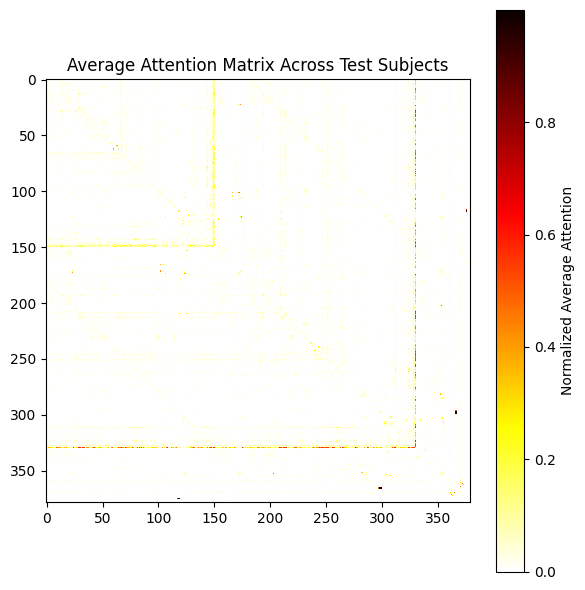

In [11]:
# Average Attention Matrix
attn_stack = np.stack(list(all_attn_matrices.values()), axis=0)

avg_attn = np.mean(attn_stack, axis=0)

plt.figure(figsize=(6, 6))
plt.imshow(avg_attn / (avg_attn.max() + 1e-8), cmap='hot_r', interpolation='nearest')
plt.colorbar(label="Normalized Average Attention")
plt.title("Average Attention Matrix Across Test Subjects")
plt.tight_layout()
plt.show()

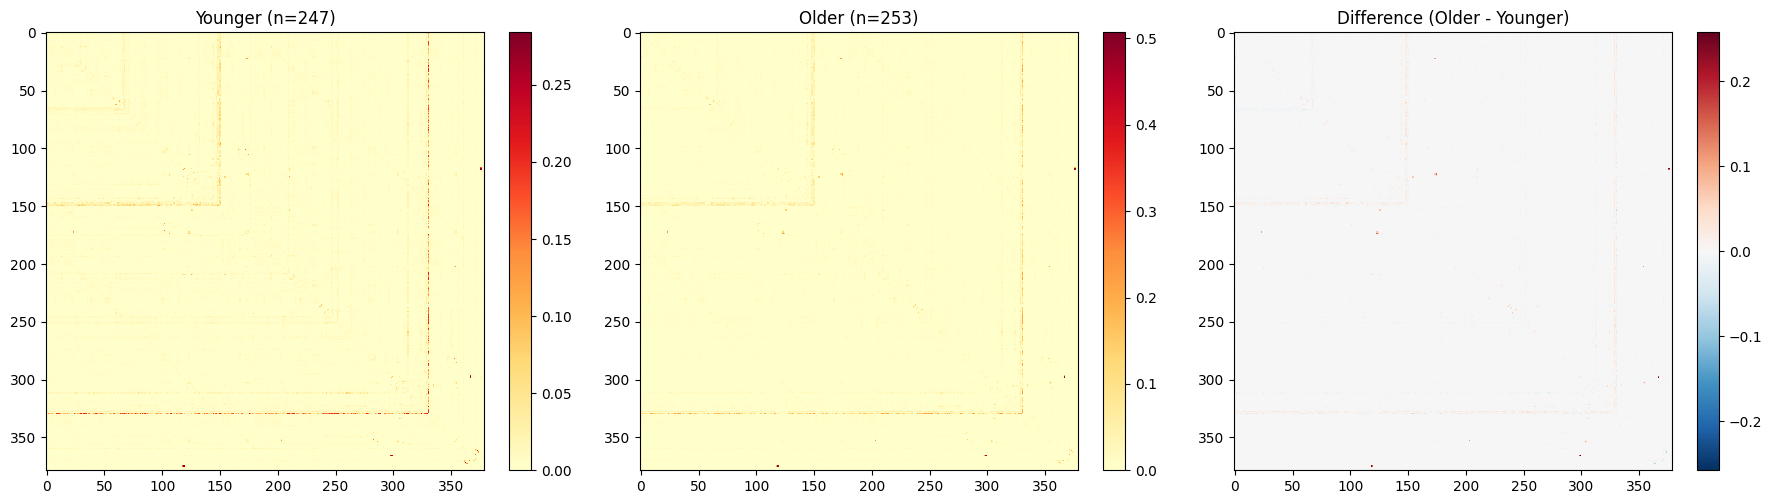

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch_geometric.loader import DataLoader

# Attention extraction
def extract_attention_matrices_dict(model, dataset, layer='gat1', batch_size=4, ignore_self_loops=True):
    """
    Extract attention matrices for all subjects in dataset, return as dict keyed by sub_id.

    Args:
        model: Trained GAT model
        dataset: list of PyG Data objects
        layer: which GAT layer to extract attention from
        batch_size: batch size for DataLoader
        ignore_self_loops: if True, set diagonal to 0

    Returns:
        all_attn_matrices: dict {sub_id: NxN attention matrix}
    """
    model.eval()
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    all_attn_matrices = {}
    num_nodes = dataset[0].x.shape[0]

    with torch.no_grad():
        for batch in loader:
            gat_layer = getattr(model, layer)
            _, (edge_index, attn_weights) = gat_layer(
                batch.x, batch.edge_index, return_attention_weights=True
            )

            # Average over heads if multi-head
            if attn_weights.dim() > 1 and attn_weights.shape[1] > 1:
                attn_weights = attn_weights.mean(dim=1)

            edge_index_np = edge_index.cpu().numpy()
            attn_np = attn_weights.cpu().numpy()
            batch_ptr = batch.ptr.cpu().numpy()

            for i, sub_id in enumerate(batch.sub_id):
                start, end = batch_ptr[i], batch_ptr[i + 1]
                mask = (edge_index_np[0] >= start) & (edge_index_np[0] < end)
                idxs = np.where(mask)[0]

                attn_mat = np.zeros((num_nodes, num_nodes))
                for j in idxs:
                    u = edge_index_np[0, j] - start
                    v = edge_index_np[1, j] - start
                    attn_mat[u, v] = attn_np[j]
                    attn_mat[v, u] = attn_np[j]  # symmetric

                if ignore_self_loops:
                    np.fill_diagonal(attn_mat, 0)

                all_attn_matrices[sub_id] = attn_mat

    return all_attn_matrices

# Compare attention by age
def compare_attention_by_age_dict(dataset, all_attn_matrices, age_threshold=None):
    """
    Compare attention patterns between younger and older subjects.
    all_attn_matrices: dict {sub_id: NxN attention matrix}
    """
    ages = {d.sub_id: d.y.item() for d in dataset}
    if age_threshold is None:
        age_threshold = np.median(list(ages.values()))

    younger_subs = [sub_id for sub_id, age in ages.items() if age < age_threshold]
    older_subs = [sub_id for sub_id, age in ages.items() if age >= age_threshold]

    if len(younger_subs) == 0 or len(older_subs) == 0:
        raise ValueError("No subjects in one of the age groups.")

    younger_attn = np.mean([all_attn_matrices[sub_id] for sub_id in younger_subs], axis=0)
    older_attn = np.mean([all_attn_matrices[sub_id] for sub_id in older_subs], axis=0)
    diff_attn = older_attn - younger_attn

    # Plot
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    im1 = axes[0].imshow(younger_attn, cmap='YlOrRd', interpolation='nearest')
    axes[0].set_title(f'Younger (n={len(younger_subs)})')
    plt.colorbar(im1, ax=axes[0], fraction=0.046)

    im2 = axes[1].imshow(older_attn, cmap='YlOrRd', interpolation='nearest')
    axes[1].set_title(f'Older (n={len(older_subs)})')
    plt.colorbar(im2, ax=axes[1], fraction=0.046)

    im3 = axes[2].imshow(diff_attn, cmap='RdBu_r', interpolation='nearest',
                         vmin=-np.abs(diff_attn).max(),
                         vmax=np.abs(diff_attn).max())
    axes[2].set_title('Difference (Older - Younger)')
    plt.colorbar(im3, ax=axes[2], fraction=0.046)

    plt.tight_layout()
    return fig, (younger_attn, older_attn, diff_attn)

all_attn_matrices = extract_attention_matrices_dict(model, dataset, layer='gat1')
fig, (young_attn, old_attn, diff_attn) = compare_attention_by_age_dict(dataset, all_attn_matrices)
plt.show()


Spectral Analysis

In [13]:
import numpy as np
from scipy.spatial.distance import cosine
from sklearn.cluster import KMeans
from scipy.linalg import eigh
import networkx as nx

# Laplacian
def laplacian_from_adj(A):
    A = np.array(A, dtype=float)
    np.fill_diagonal(A, 0)
    A = np.clip(A, a_min=0, a_max=None)
    D = np.diag(A.sum(axis=1))
    return D - A

# Spectral subnetworks
def spectral_subnetworks_from_L(L, p=6, k_clusters=6, normalize_eigvecs=True):
    vals, vecs = eigh(L)
    Vp = vecs[:, :p]
    if normalize_eigvecs:
        Vp = Vp / (np.linalg.norm(Vp, axis=1, keepdims=True) + 1e-12)
    kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(Vp)
    labels = kmeans.labels_
    return labels, vals[:p], Vp

# Extract high-attention edges
def extract_high_attention_edges(attn_mat, percentile=80):
    """
    Extract top X percentile of edges by attention weight.
    Returns edge list as set of (i,j) tuples where i < j

    Args:
        attn_mat: NxN attention matrix
        percentile: Keep edges above this percentile (0-100)
                   e.g., 80 = top 20% of edges
    """
    N = attn_mat.shape[0]
    mat = attn_mat.copy()
    np.fill_diagonal(mat, 0)

    # Get all non-zero attention values
    all_weights = []
    for i in range(N):
        for j in range(i+1, N):
            weight = max(mat[i, j], mat[j, i])  # Take max of both directions
            if weight > 0:
                all_weights.append(weight)

    if len(all_weights) == 0:
        return set()

    # Compute threshold based on percentile
    threshold = np.percentile(all_weights, percentile)

    # Extract edges above threshold
    high_attn_edges = set()
    for i in range(N):
        for j in range(i+1, N):
            weight = max(mat[i, j], mat[j, i])
            if weight >= threshold:
                high_attn_edges.add((i, j))

    return high_attn_edges

# Extract spectral cluster edges
def extract_spectral_edges(spec_labels):
    """
    Extract edges within each spectral cluster.
    Returns dict mapping cluster_id -> set of edges
    """
    N = len(spec_labels)
    spectral_edges = {}

    for cluster_id in np.unique(spec_labels):
        cluster_nodes = np.where(spec_labels == cluster_id)[0]
        edges_in_cluster = set()

        # All edges within this cluster
        for i in cluster_nodes:
            for j in cluster_nodes:
                if i < j:  # Avoid duplicates
                    edges_in_cluster.add((i, j))

        spectral_edges[cluster_id] = edges_in_cluster

    return spectral_edges

# Find consensus subnetworks
def find_consensus_subnetworks(high_attn_edges, spectral_edges, spec_labels):
    """
    Find edges that appear in BOTH high-attention and spectral clusters.

    Returns:
        consensus_subnetworks: dict with cluster_id -> consensus info
    """
    consensus_subnetworks = {}

    for cluster_id, cluster_edges in spectral_edges.items():
        # Find intersection: edges in both sets
        consensus_edges = high_attn_edges.intersection(cluster_edges)

        # Calculate overlap metrics
        n_consensus = len(consensus_edges)
        n_cluster = len(cluster_edges)

        if n_cluster > 0:
            overlap_ratio = n_consensus / n_cluster
        else:
            overlap_ratio = 0

        # Get nodes in this cluster
        cluster_nodes = np.where(spec_labels == cluster_id)[0]

        # Get nodes involved in consensus edges
        consensus_nodes = set()
        for i, j in consensus_edges:
            consensus_nodes.add(i)
            consensus_nodes.add(j)

        consensus_subnetworks[cluster_id] = {
            'consensus_edges': consensus_edges,
            'n_consensus_edges': n_consensus,
            'n_cluster_edges': n_cluster,
            'overlap_ratio': overlap_ratio,
            'cluster_nodes': cluster_nodes.tolist(),
            'consensus_nodes': list(consensus_nodes),
            'n_consensus_nodes': len(consensus_nodes)
        }

    return consensus_subnetworks

# Metrics for consensus analysis
def compute_consensus_metrics(consensus_subnetworks, high_attn_edges):
    """
    Compute aggregate metrics across all consensus subnetworks
    """
    # Total consensus edges across all clusters
    total_consensus_edges = set()
    for data in consensus_subnetworks.values():
        total_consensus_edges.update(data['consensus_edges'])

    # What fraction of high-attention edges are in consensus?
    consensus_coverage = len(total_consensus_edges) / len(high_attn_edges) if len(high_attn_edges) > 0 else 0

    # How many clusters have meaningful consensus?
    significant_clusters = sum(1 for data in consensus_subnetworks.values()
                              if data['overlap_ratio'] > 0.1)  # >10% overlap

    return {
        'total_consensus_edges': len(total_consensus_edges),
        'total_high_attn_edges': len(high_attn_edges),
        'consensus_coverage': consensus_coverage,
        'n_significant_clusters': significant_clusters,
        'n_total_clusters': len(consensus_subnetworks)
    }

# Full analysis for all subjects
def analyze_consensus_all_subjects(cov_dict, all_attn_matrices,
                                   percentile=80, p=6, k_clusters=6):
    """
    Perform consensus analysis for all subjects

    Args:
        percentile: Keep top X% of edges by attention (e.g., 80 = top 20%)
        p: Number of eigenvectors for spectral clustering
        k_clusters: Number of clusters
    """
    results = {}

    for subj_id, cov in cov_dict.items():
        if subj_id not in all_attn_matrices:
            continue

        attn = all_attn_matrices[subj_id]
        L = laplacian_from_adj(cov)

        # Spectral clustering
        spec_labels, vals, vecs = spectral_subnetworks_from_L(L, p=p, k_clusters=k_clusters)

        # Extract high-attention edges (PERCENTILE-BASED)
        high_attn_edges = extract_high_attention_edges(attn, percentile=percentile)

        # Extract spectral cluster edges
        spectral_edges = extract_spectral_edges(spec_labels)

        # Find consensus
        consensus_subnetworks = find_consensus_subnetworks(
            high_attn_edges, spectral_edges, spec_labels
        )

        # Compute metrics
        metrics = compute_consensus_metrics(consensus_subnetworks, high_attn_edges)

        results[subj_id] = {
            'consensus_subnetworks': consensus_subnetworks,
            'metrics': metrics,
            'spec_labels': spec_labels,
            'high_attn_edges': high_attn_edges
        }

    return results

# CROSS-SUBJECT CONSENSUS ANALYSIS
def aggregate_consensus_across_subjects(consensus_results, min_subjects=0.5):
    """
    Find consensus edges that appear consistently across multiple subjects.
    """
    n_subjects = len(consensus_results)

    if min_subjects <= 1.0:
        min_count = int(min_subjects * n_subjects)
    else:
        min_count = int(min_subjects)

    # Count how many subjects have each consensus edge
    edge_counts = {}

    for subj_id, result in consensus_results.items():
        # Get all consensus edges for this subject
        all_consensus_edges = set()
        for cluster_data in result['consensus_subnetworks'].values():
            all_consensus_edges.update(cluster_data['consensus_edges'])

        # Count each edge
        for edge in all_consensus_edges:
            if edge not in edge_counts:
                edge_counts[edge] = []
            edge_counts[edge].append(subj_id)

    # Filter edges that appear in enough subjects
    reproducible_edges = {}
    for edge, subjects in edge_counts.items():
        count = len(subjects)
        if count >= min_count:
            reproducible_edges[edge] = {
                'count': count,
                'frequency': count / n_subjects,
                'subjects': subjects
            }

    return reproducible_edges, edge_counts

def find_reproducible_subnetworks(reproducible_edges, min_edge_frequency=0.3, min_cluster_size=5):
    """
    Identify cohesive subnetworks formed by reproducible consensus edges.
    """
    # Build graph from reproducible edges
    G = nx.Graph()
    for edge, data in reproducible_edges.items():
        if data['frequency'] >= min_edge_frequency:
            G.add_edge(edge[0], edge[1], weight=data['frequency'])

    # Find connected components (cohesive subnetworks)
    subnetworks = []
    for component in nx.connected_components(G):
        if len(component) >= min_cluster_size:
            nodes = list(component)
            edges = [(u, v) for u, v in G.edges() if u in component and v in component]

            # Calculate average edge frequency
            avg_frequency = np.mean([reproducible_edges[(min(u,v), max(u,v))]['frequency']
                                    for u, v in edges])

            subnetworks.append({
                'nodes': sorted(nodes),
                'n_nodes': len(nodes),
                'edges': edges,
                'n_edges': len(edges),
                'avg_edge_frequency': avg_frequency,
                'density': len(edges) / (len(nodes) * (len(nodes) - 1) / 2) if len(nodes) > 1 else 0
            })

    # Sort by number of nodes (largest first)
    subnetworks.sort(key=lambda x: x['n_nodes'], reverse=True)

    return subnetworks

def summarize_cluster_consistency(consensus_results):
    """
    Analyze which spectral clusters consistently have high consensus across subjects.
    """
    # Track cluster metrics across all subjects
    cluster_stats = {}

    for subj_id, result in consensus_results.items():
        for cluster_id, data in result['consensus_subnetworks'].items():
            if cluster_id not in cluster_stats:
                cluster_stats[cluster_id] = {
                    'overlap_ratios': [],
                    'n_consensus_edges': [],
                    'n_nodes': [],
                    'subjects_with_cluster': []
                }

            cluster_stats[cluster_id]['overlap_ratios'].append(data['overlap_ratio'])
            cluster_stats[cluster_id]['n_consensus_edges'].append(data['n_consensus_edges'])
            cluster_stats[cluster_id]['n_nodes'].append(len(data['cluster_nodes']))
            cluster_stats[cluster_id]['subjects_with_cluster'].append(subj_id)

    # Compute summary statistics
    summary = []
    for cluster_id, stats in cluster_stats.items():
        summary.append({
            'cluster_id': cluster_id,
            'n_subjects': len(stats['subjects_with_cluster']),
            'mean_overlap': np.mean(stats['overlap_ratios']),
            'std_overlap': np.std(stats['overlap_ratios']),
            'mean_consensus_edges': np.mean(stats['n_consensus_edges']),
            'mean_nodes': np.mean(stats['n_nodes']),
            'high_overlap_subjects': sum(1 for x in stats['overlap_ratios'] if x > 0.1)
        })

    # Sort by mean overlap (best performing clusters first)
    summary.sort(key=lambda x: x['mean_overlap'], reverse=True)

    return summary


# BRAIN REGION MAPPING FUNCTIONS
def map_subnetworks_to_regions(subnetworks, roi_labels):
    """
    Map node IDs in subnetworks to actual brain region names.

    Args:
        subnetworks: List of subnetwork dictionaries
        roi_labels: List of ROI names (e.g., ['R_V1_ROI', 'R_MST_ROI', ...])

    Returns:
        Subnetworks with added 'region_names' field
    """
    for subnet in subnetworks:
        region_names = [roi_labels[node_id] for node_id in subnet['nodes']]
        subnet['region_names'] = region_names

    return subnetworks

def print_subnetwork_regions(subnetworks, roi_labels, n_subnetworks=3):
    """
    Pretty print brain regions in each subnetwork.
    """
    print("BRAIN REGIONS IN REPRODUCIBLE SUBNETWORKS")

    for idx, subnet in enumerate(subnetworks[:n_subnetworks], 1):
        print(f"\n--- Subnetwork {idx} ({subnet['n_nodes']} regions) ---")

        region_names = [roi_labels[node_id] for node_id in subnet['nodes']]

        # Group by hemisphere if ROI names start with L_ or R_
        left_regions = [r for r in region_names if r.startswith('L_')]
        right_regions = [r for r in region_names if r.startswith('R_')]
        other_regions = [r for r in region_names if not (r.startswith('L_') or r.startswith('R_'))]

        if right_regions:
            print(f"\nRight hemisphere ({len(right_regions)} regions):")
            for r in sorted(right_regions):
                print(f"  {r}")

        if left_regions:
            print(f"\nLeft hemisphere ({len(left_regions)} regions):")
            for r in sorted(left_regions):
                print(f"  {r}")

        if other_regions:
            print(f"\nOther regions ({len(other_regions)}):")
            for r in sorted(other_regions):
                print(f"  {r}")

def analyze_subnetwork_composition(subnetworks, roi_labels):
    """
    Analyze what types of brain regions appear in subnetworks.
    """
    print("SUBNETWORK COMPOSITION ANALYSIS")

    for idx, subnet in enumerate(subnetworks[:3], 1):
        region_names = [roi_labels[node_id] for node_id in subnet['nodes']]

        # Count region types (based on common prefixes in HCP parcellation)
        region_types = {}
        for region in region_names:
            # Extract region type (e.g., V1, MST, FEF from R_V1_ROI)
            parts = region.split('_')
            if len(parts) >= 2:
                region_type = parts[1]  # e.g., 'V1', 'MST', '4'
                region_types[region_type] = region_types.get(region_type, 0) + 1

        print(f"\nSubnetwork {idx}:")
        print(f"  Total regions: {len(region_names)}")
        print(f"  Unique region types: {len(region_types)}")
        print(f"  Most common types:")

        # Sort by frequency
        sorted_types = sorted(region_types.items(), key=lambda x: x[1], reverse=True)
        for region_type, count in sorted_types[:10]:
            print(f"    {region_type}: {count}")

# MAIN ANALYSIS PIPELINE

# k=10
fixed_k = 10  # Choose number of clusters
print(f"\nUsing k={fixed_k} clusters\n")

k_values = [fixed_k]
multi_scale_results = {}

for k in k_values:
    results = analyze_consensus_all_subjects(
        cov_dict,
        all_attn_matrices,
        percentile=80,
        p=min(15, k),
        k_clusters=k
    )

    coverage_scores = [r['metrics']['consensus_coverage'] for r in results.values()]
    sig_clusters = [r['metrics']['n_significant_clusters'] for r in results.values()]
    consensus_edges = [r['metrics']['total_consensus_edges'] for r in results.values()]

    multi_scale_results[k] = {
        'results': results,
        'mean_coverage': np.mean(coverage_scores),
        'std_coverage': np.std(coverage_scores),
        'mean_sig_clusters': np.mean(sig_clusters),
        'mean_consensus_edges': np.mean(consensus_edges)
    }

    print(f"  Coverage: {np.mean(coverage_scores):.3f} ± {np.std(coverage_scores):.3f}")
    print(f"  Significant clusters: {np.mean(sig_clusters):.1f}")
    print(f"  Consensus edges: {np.mean(consensus_edges):.1f}")

best_k = fixed_k
consensus_results = multi_scale_results[best_k]['results']

best_k = fixed_k
consensus_results = multi_scale_results[best_k]['results']

# Cross-subject reproducibility
print("CROSS-SUBJECT REPRODUCIBILITY")

reproducible_edges, all_edge_counts = aggregate_consensus_across_subjects(
    consensus_results,
    min_subjects=0.3
)

print(f"\nTotal unique consensus edges: {len(all_edge_counts)}")
print(f"Reproducible edges (≥30% subjects): {len(reproducible_edges)}")

# Show most reproducible edges
print("TOP 50 MOST REPRODUCIBLE CONSENSUS EDGES")
print(f"\n{'Rank':<6} {'Edge (i,j)':<20} {'Frequency':<12} {'# Subjects':<12}")

sorted_edges = sorted(reproducible_edges.items(),
                     key=lambda x: x[1]['frequency'],
                     reverse=True)

for rank, (edge, data) in enumerate(sorted_edges[:50], 1):
    print(f"{rank:<6} {str(edge):<20} {data['frequency']:<12.3f} {data['count']:<12}")

#  Find subnetworks
print("REPRODUCIBLE SUBNETWORKS")

subnetworks = find_reproducible_subnetworks(
    reproducible_edges,
    min_edge_frequency=0.3,
    min_cluster_size=5
)

print(f"\nFound {len(subnetworks)} reproducible subnetworks\n")

for idx, subnet in enumerate(subnetworks[:5]):
    print(f"Subnetwork {idx+1}:")
    print(f"  Nodes: {subnet['n_nodes']} nodes")
    print(f"  Edges: {subnet['n_edges']} edges")
    print(f"  Avg edge frequency: {subnet['avg_edge_frequency']:.3f}")
    print(f"  Density: {subnet['density']:.3f}")
    print(f"  Node IDs: {subnet['nodes'][:15]}{'...' if len(subnet['nodes']) > 15 else ''}")
    print()

# Show edges in each subnetwork
print("EDGES IN EACH REPRODUCIBLE SUBNETWORK")

for idx, subnet in enumerate(subnetworks[:3], 1):
    print(f"\nSubnetwork {idx} ({subnet['n_nodes']} nodes, {subnet['n_edges']} edges)")

    # Get edges with frequencies
    subnet_edges_with_freq = []
    for edge in subnet['edges']:
        edge_tuple = (min(edge[0], edge[1]), max(edge[0], edge[1]))
        if edge_tuple in reproducible_edges:
            freq = reproducible_edges[edge_tuple]['frequency']
            subnet_edges_with_freq.append((edge_tuple, freq))

    # Sort by frequency
    subnet_edges_with_freq.sort(key=lambda x: x[1], reverse=True)

    # Show top 20 or all
    n_show = min(20, len(subnet_edges_with_freq))
    print(f"\nTop {n_show} edges by frequency:")
    print(f"{'Edge':<20} {'Frequency':<12}")

    for edge, freq in subnet_edges_with_freq[:n_show]:
        print(f"{str(edge):<20} {freq:<12.3f}")

    if len(subnet_edges_with_freq) > n_show:
        print(f" and {len(subnet_edges_with_freq) - n_show} more edges")

# Cluster consistency
print("SPECTRAL CLUSTER CONSISTENCY")

cluster_summary = summarize_cluster_consistency(consensus_results)

print(f"\n{'Cluster':<10} {'N Subj':<10} {'Mean Overlap':<15} {'High Overlap':<15} {'Mean Edges':<12}")

for stats in cluster_summary[:15]:
    print(f"{stats['cluster_id']:<10} {stats['n_subjects']:<10} "
          f"{stats['mean_overlap']:<15.3f} {stats['high_overlap_subjects']:<15} "
          f"{stats['mean_consensus_edges']:<12.1f}")



Using k=10 clusters

  Coverage: 0.437 ± 0.086
  Significant clusters: 2.7
  Consensus edges: 1142.3
CROSS-SUBJECT REPRODUCIBILITY

Total unique consensus edges: 41863
Reproducible edges (≥30% subjects): 305
TOP 50 MOST REPRODUCIBLE CONSENSUS EDGES

Rank   Edge (i,j)           Frequency    # Subjects  
1      (np.int64(213), np.int64(330)) 0.794        397         
2      (np.int64(247), np.int64(330)) 0.758        379         
3      (np.int64(214), np.int64(330)) 0.744        372         
4      (149, 330)           0.742        371         
5      (299, 366)           0.732        366         
6      (212, 330)           0.732        366         
7      (34, 330)            0.722        361         
8      (209, 330)           0.722        361         
9      (32, 330)            0.710        355         
10     (np.int64(67), np.int64(330)) 0.698        349         
11     (251, 330)           0.684        342         
12     (329, 330)           0.682        341         
13     (

In [14]:
# Map to brain regions

# Extract ROI labels from one of your covariance CSV files
def load_roi_labels(csv_path):
    df = pd.read_csv(csv_path, header=None)

    # Get labels from first row, skip the first cell (which is usually empty or "ROI")
    roi_labels = df.iloc[0, 1:].tolist()

    # Clean up labels (remove any extra whitespace, NaN, etc.)
    roi_labels = [str(label).strip() for label in roi_labels if pd.notna(label)]

    return roi_labels

# Load ROI labels from the first subject's file
first_subject_file = os.path.join(cov_dir, f"{first_id}.csv")
roi_labels = load_roi_labels(first_subject_file)

print(f"Extracted {len(roi_labels)} ROI labels")
print(f"First 10 labels: {roi_labels[:10]}")
print(f"Last 10 labels: {roi_labels[-10:]}")

# Print regions in each subnetwork
print_subnetwork_regions(subnetworks, roi_labels, n_subnetworks=3)

# Analyze composition
analyze_subnetwork_composition(subnetworks, roi_labels)

Extracted 379 ROI labels
First 10 labels: ['R_V1_ROI', 'R_MST_ROI', 'R_V6_ROI', 'R_V2_ROI', 'R_V3_ROI', 'R_V4_ROI', 'R_V8_ROI', 'R_4_ROI', 'R_3b_ROI', 'R_FEF_ROI']
Last 10 labels: ['DIENCEPHALON_VENTRAL_LEFT', 'CEREBELLUM_RIGHT', 'THALAMUS_RIGHT', 'CAUDATE_RIGHT', 'PUTAMEN_RIGHT', 'PALLIDUM_RIGHT', 'HIPPOCAMPUS_RIGHT', 'AMYGDALA_RIGHT', 'ACCUMBENS_RIGHT', 'DIENCEPHALON_VENTRAL_RIGHT']
BRAIN REGIONS IN REPRODUCIBLE SUBNETWORKS

--- Subnetwork 1 (71 regions) ---

Right hemisphere (38 regions):
  R_10d_ROI
  R_10r_ROI
  R_10v_ROI
  R_23d_ROI
  R_31a_ROI
  R_31pd_ROI
  R_31pv_ROI
  R_47l_ROI
  R_47s_ROI
  R_7m_ROI
  R_8Ad_ROI
  R_8Av_ROI
  R_8BL_ROI
  R_8BM_ROI
  R_8C_ROI
  R_9a_ROI
  R_9m_ROI
  R_9p_ROI
  R_IP1_ROI
  R_PFm_ROI
  R_PGi_ROI
  R_PGs_ROI
  R_POS1_ROI
  R_POS2_ROI
  R_RSC_ROI
  R_STSva_ROI
  R_STSvp_ROI
  R_TE1a_ROI
  R_TE1m_ROI
  R_TE1p_ROI
  R_TGd_ROI
  R_a47r_ROI
  R_d23ab_ROI
  R_d32_ROI
  R_i6_8_ROI
  R_p9_46v_ROI
  R_s6_8_ROI
  R_v23ab_ROI

Left hemisphere (33 regions):


In [15]:
import pandas as pd
import re
from collections import Counter

# Load and normalize brain region CSV
def load_brain_regions(csv_path):
    df = pd.read_csv(csv_path)
    region_map = {}

    for _, row in df.iterrows():
        key = row['regionName']

        # Replace '-' with '_'
        key = key.replace('-', '_')

        # Move hemisphere to front if at the end
        if key.endswith('_L'):
            key = 'L_' + key[:-2]
        elif key.endswith('_R'):
            key = 'R_' + key[:-2]

        region_map[key] = {
            'regionLongName': row['regionLongName'],
            'cortex': row['cortex']
        }

    return region_map

# Map subnetwork nodes to region names + cortex
def map_subnetworks_with_labels(subnetworks, roi_labels, region_map):
    mapped_subnetworks = []

    for subnet in subnetworks:
        region_names = []
        cortex_names = []
        for idx in subnet['nodes']:
            label = roi_labels[idx]

            # Remove _ROI from ROI label
            label_fixed = label.removesuffix('_ROI')

            label_fixed = re.sub(r'(?<=\d)-(?=\d)', '_', label_fixed)

            # Search in normalized CSV region map
            matched = None
            cortex = "Unknown"
            for key in region_map:
                if label_fixed in key:
                    matched = region_map[key]['regionLongName']
                    cortex = region_map[key]['cortex']
                    break
            if matched is None:
                matched = f"Unknown_{label_fixed}"

            region_names.append(matched)
            cortex_names.append(cortex)

        new_subnet = subnet.copy()
        new_subnet['region_names'] = region_names
        new_subnet['cortex_names'] = cortex_names
        mapped_subnetworks.append(new_subnet)

    return mapped_subnetworks

csv_path = "/content/drive/Shareddrives/291A_Brain_Connectomes/HCP-MMP1_UniqueRegionList.csv"
region_map = load_brain_regions(csv_path)

mapped_subnetworks = map_subnetworks_with_labels(subnetworks, roi_labels, region_map)

# Print subnetworks
for idx, subnet in enumerate(mapped_subnetworks):
    print(f"\nSubnetwork {idx+1} ({subnet['n_nodes']} nodes):")
    print(f"{'Region':<35} {'Cortex'}")
    print("-" * 50)
    for region, cortex in zip(subnet['region_names'], subnet['cortex_names']):
        print(f"{region:<35} {cortex}")

    # Compute and print cortex frequency
    cortex_counter = Counter(subnet['cortex_names'])
    print("\nCortex frequencies:")
    for cortex, count in sorted(cortex_counter.items(), key=lambda x: x[1], reverse=True):
        pct = 100 * count / len(subnet['cortex_names'])
        print(f"{cortex:<45} {count} ({pct:.1f}%)")




Subnetwork 1 (71 nodes):
Region                              Cortex
--------------------------------------------------
RetroSplenial_Complex_R             Posterior_Cingulate
Parieto-Occipital_Sulcus_Area_2_R   Posterior_Cingulate
Area_7m_R                           Posterior_Cingulate
Parieto-Occipital_Sulcus_Area_1_R   Posterior_Cingulate
Area_23d_R                          Posterior_Cingulate
Area_ventral_23_a+b_R               Posterior_Cingulate
Area_dorsal_23_a+b_R                Posterior_Cingulate
Area_31p_ventral_R                  Posterior_Cingulate
Area_dorsal_32_R                    Anterior_Cingulate_and_Medial_Prefrontal
Area_8BM_R                          Anterior_Cingulate_and_Medial_Prefrontal
Area_10r_R                          Anterior_Cingulate_and_Medial_Prefrontal
Area_8Av_R                          Dorsolateral_Prefrontal
Area_8Ad_R                          Dorsolateral_Prefrontal
Area_9_Middle_R                     Anterior_Cingulate_and_Medial_Prefrontal
Area